In [1]:
import sys
sys.path.insert(1, '/media/bruno/Matosak/repos/SenForFlood')

import torch
from models import AttUNet_t
import numpy as np
import matplotlib.pyplot as plt
from SenForFlood import SenForFlood

In [2]:
data = torch.load('/media/bruno/Matosak/repos/SenForFlood/Examples/models_FM/bangladesh_attunet_cs128_b32/Checkpoints/model-e0003.pt', weights_only=True)

In [3]:
model = AttUNet_t(2,2,32,0).to('cuda')
model.load_state_dict(data['model_state_dict'])
model.eval()

AttUNet_t(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (transp_conv1): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
  (transp_conv2): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
  (transp_conv3): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
  (in_xt): Sequential(
    (0): Conv2d(2, 16, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (in_t): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (conv1): Sequential(
    (0): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Dropout(p=0, inplace=T

In [4]:
test_dataset = SenForFlood(
    dataset_folder='/media/bruno/Matosak/SenForFlood',
    chip_size=512,
    events=['DFO_4459_Bangladesh'],
    data_to_include=['s1_before_flood', 's1_during_flood'],
    use_data_augmentation=True
)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, drop_last=False)

In [12]:
for ind, (x1, x0) in enumerate(test_loader):
    x1 = x1[:,:2]
    x0 = x0[:,:2]
    break

model.eval()
with torch.no_grad():
    xts = [x0]
    t_span = torch.linspace(0, 1, 10)
    for s,t in zip(t_span[:-1], t_span[1:]):
        xt = xts[-1]
        t_expanded = (torch.zeros([xt.shape[0], 1, xt.shape[2], xt.shape[3]])+t)
        xts.append((model(xt.to('cuda'), t_expanded.to('cuda')).detach().cpu() * (t - s) + xt).detach().cpu())
    # plot_pairs(x0, x1, xts, f'models_FM/{model_id}/plots')

In [13]:
xts[-1].shape

torch.Size([2, 2, 512, 512])

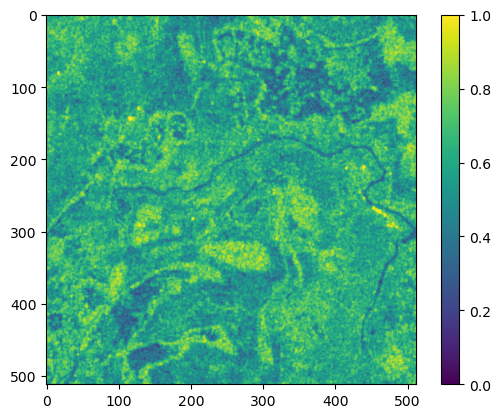

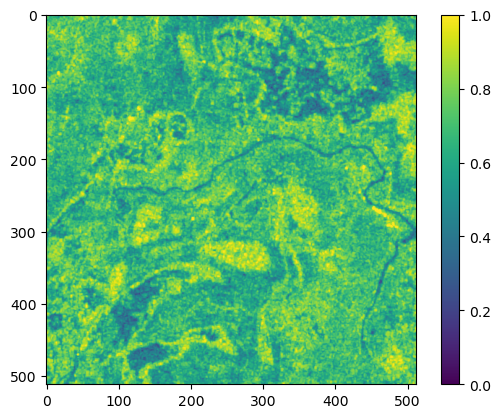

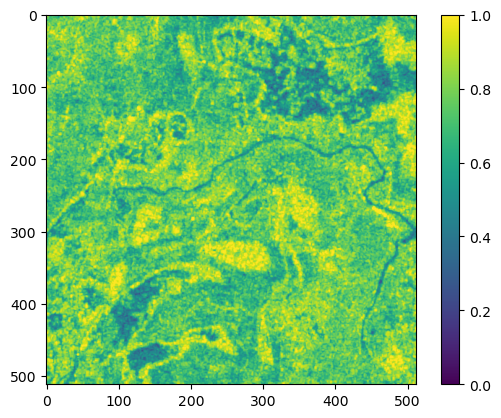

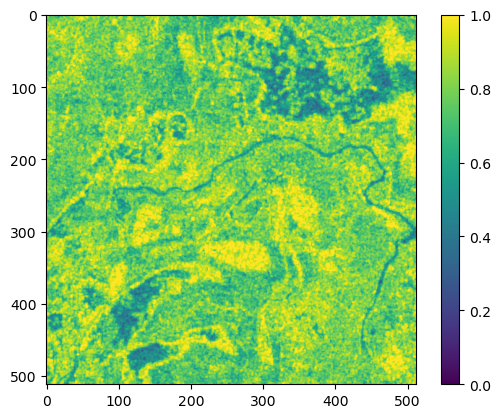

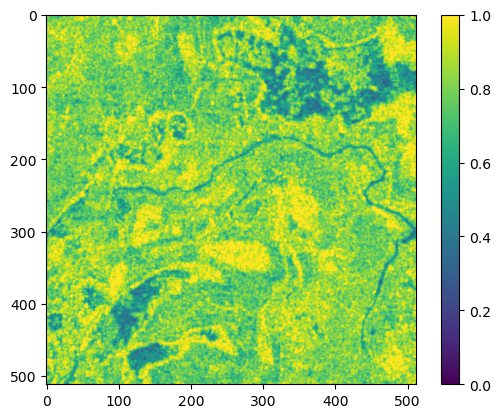

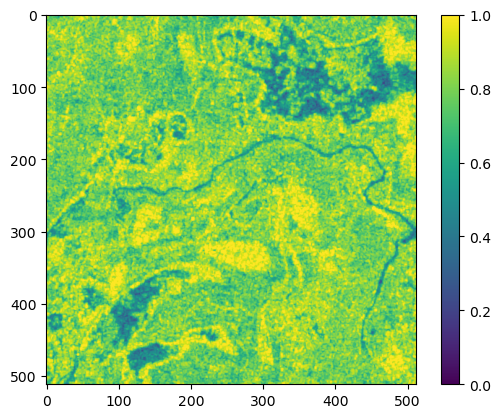

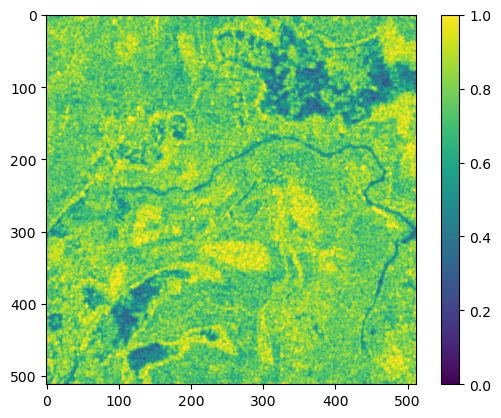

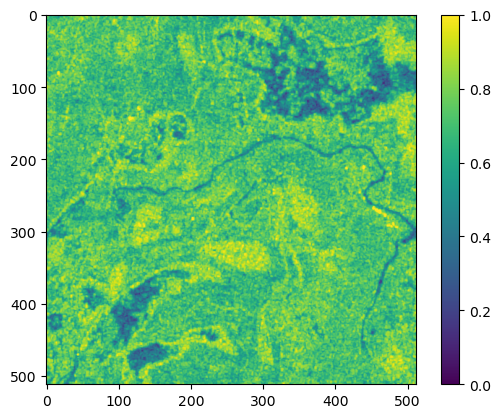

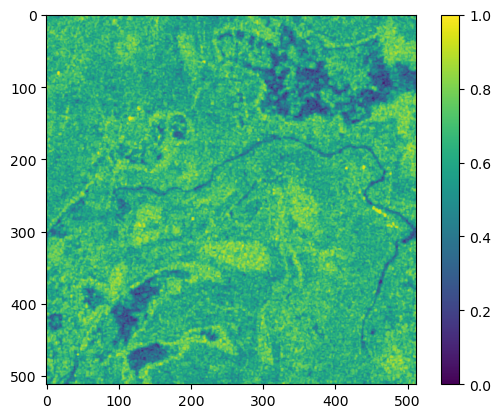

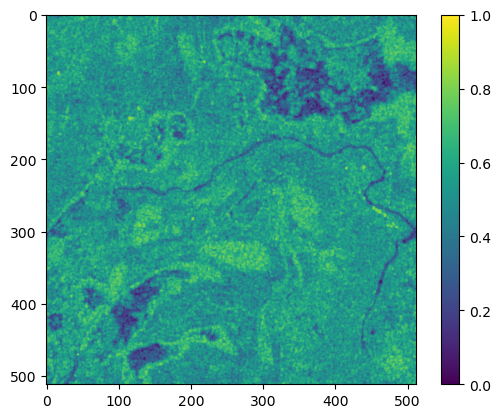

In [18]:
for i in range(10):
    plt.imshow(xts[i][-1][0], vmin=0, vmax=1)
    plt.colorbar()
    plt.show()

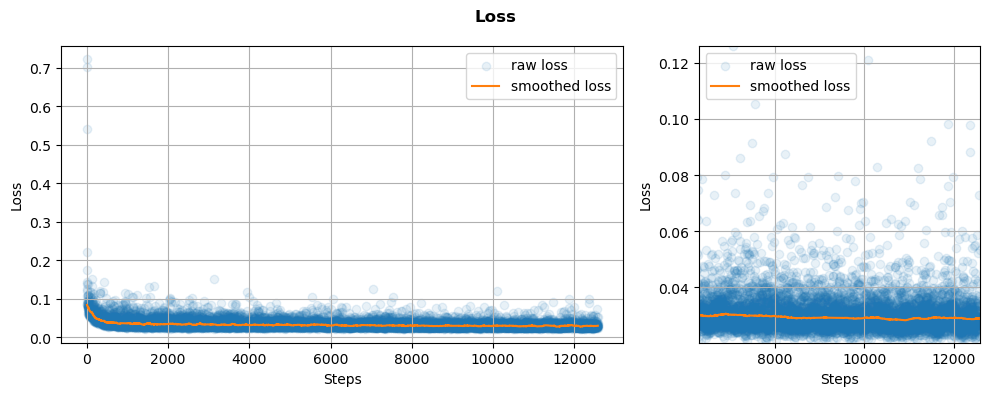

In [2]:
from FM_train import plot_loss
import torch

data = torch.load('/media/bruno/Matosak/repos/SenForFlood/Examples/models_FM/test_bangladesh/Checkpoints/model-e0004.pt', weights_only=True)
plot_loss(data['loss'])